In [1]:
import bs
import mc
import bm

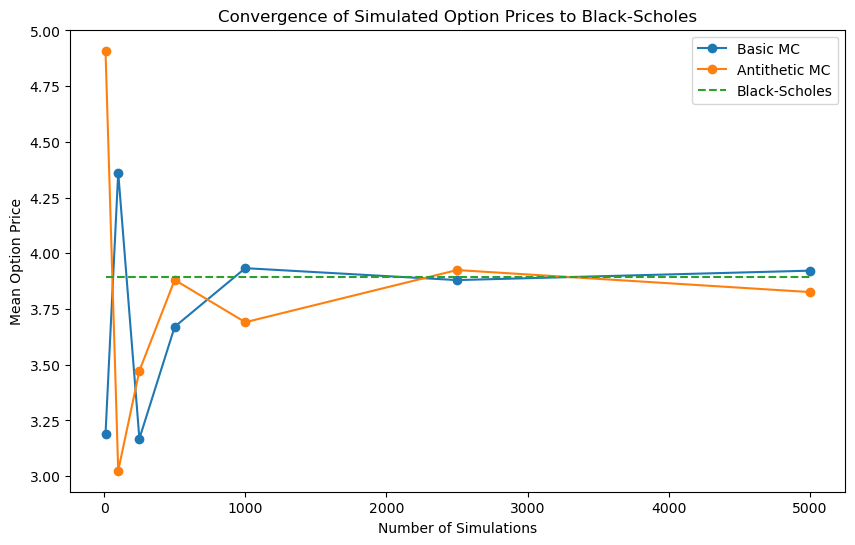

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S = 40  # Current stock price
K = 40  # Strike price
T = 0.5  # Time to expiration
r = 0.09  # Risk-free rate
sigma = 0.3  # Volatility
q = 0.03  # Dividend rate
option_type = 'call'

# Vary the number of simulations
n_simulations_range = [10,100, 250, 500,1000, 2500,5000]
n_time_steps = 10  # choose an appropriate value for n_time_steps

# Lists to store the mean option prices for each n_sim value
mean_option_prices_basic = []
mean_option_prices_antithetic = []
mean_bs_prices = []

for n_sim in n_simulations_range:
    # Simulate option prices using both methods
    option_prices_basic =  mean_option_prices_basic.append(mc.monte_carlo_option_pricing_basic(option_type, S, K, T, r, sigma, q, n_sim, n_time_steps)[0])
    option_prices_antithetic =  mean_option_prices_antithetic.append(mc.monte_carlo_option_pricing_antithetic(option_type, S, K, T, r, sigma, q, n_sim, n_time_steps)[0])

    # Calculate Black-Scholes prices
    bs_prices = mean_bs_prices.append(bs.black_scholes_dividend(option_type, S, K, T, r, sigma, q))

    
# Create a plot to show convergence
plt.figure(figsize=(10, 6))
plt.plot(n_simulations_range, mean_option_prices_basic, label='Basic MC', marker='o')
plt.plot(n_simulations_range, mean_option_prices_antithetic, label='Antithetic MC', marker='o')
plt.plot(n_simulations_range, mean_bs_prices, label='Black-Scholes', linestyle='--')
plt.xlabel('Number of Simulations')
plt.ylabel('Mean Option Price')
plt.title('Convergence of Simulated Option Prices to Black-Scholes')
plt.legend()
plt.show()


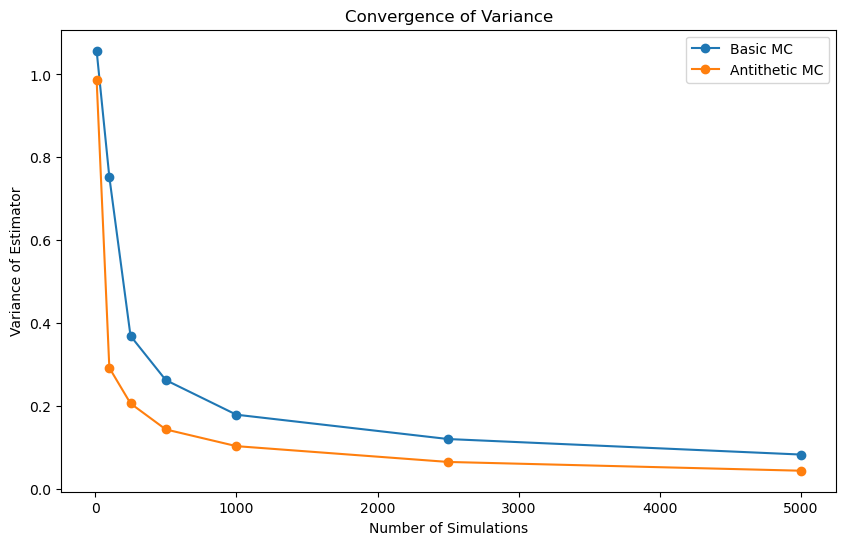

In [7]:
var_option_prices_basic = []
var_option_prices_antithetic = []
mean_bs_prices = []

for n_sim in n_simulations_range:
    # Simulate option prices using both methods
    option_prices_basic =  var_option_prices_basic.append(mc.monte_carlo_option_pricing_basic(option_type, S, K, T, r, sigma, q, n_sim, n_time_steps)[1])
    option_prices_antithetic =  var_option_prices_antithetic.append(mc.monte_carlo_option_pricing_antithetic(option_type, S, K, T, r, sigma, q, n_sim, n_time_steps)[1])

    
# Create a plot to show convergence
plt.figure(figsize=(10, 6))
plt.plot(n_simulations_range, var_option_prices_basic, label='Basic MC', marker='o')
plt.plot(n_simulations_range, var_option_prices_antithetic, label='Antithetic MC', marker='o')
plt.xlabel('Number of Simulations')
plt.ylabel('Variance of Estimator')
plt.title('Convergence of Variance')
plt.legend()
plt.show()

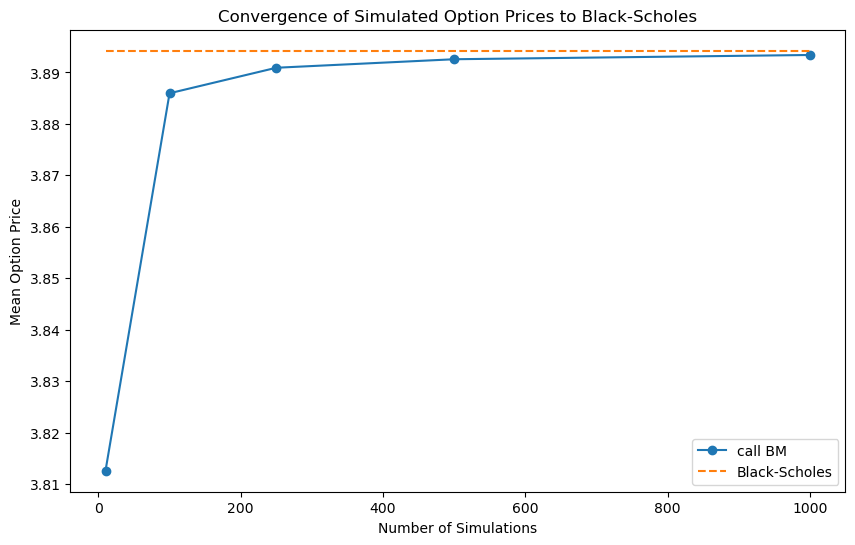

In [8]:
# Lists to store the mean option prices for each n_sim value
option_prices_bm = []
bs_prices = []
n_simulations_range = [10,100, 250,500,1000]


for n_sim in n_simulations_range:
    # Simulate option prices using both methods
    option_price = option_prices_bm.append(bm.crr_binomial_option_pricing(S, K, T, r, sigma, n_sim, option_type, q))
    bs_p = bs_prices.append(bs.black_scholes_dividend(option_type, S, K, T, r, sigma, q))

    
# Create a plot to show convergence
plt.figure(figsize=(10, 6))
plt.plot(n_simulations_range, option_prices_bm, label=f'{option_type} BM', marker='o')
plt.plot(n_simulations_range, bs_prices, label='Black-Scholes', linestyle='--')
plt.xlabel('Number of Simulations')
plt.ylabel('Mean Option Price')
plt.title('Convergence of Simulated Option Prices to Black-Scholes')
plt.legend()
plt.show()